In [2]:
import pandas as pd

df = pd.read_csv("Daily Household Transactions.csv")
df.head()


,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


In [3]:
df['Category'].fillna('Unknown', inplace=True)
df.dropna(subset=['Date', 'Amount'], inplace=True)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.drop_duplicates(inplace=True)
print("✅ Data cleaned successfully!")


✅ Data cleaned successfully!


/tmp/ipykernel_340/222997491.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [4]:
print("Total Transactions:", len(df))
print("Total Amount Spent (Expenses): ₹", df[df['Income/Expense']=='Expense']['Amount'].sum())
print("Total Income: ₹", df[df['Income/Expense']=='Income']['Amount'].sum())
df['Category'].value_counts().head(10)


Total Transactions: 2057
Total Amount Spent (Expenses): ₹ 1356344.13
Total Income: ₹ 3042355.35


Category
Food              841
Transportation    290
Household         175
Other             124
subscription      109
Health             94
Family             65
Apparel            47
Salary             43
Gift               30
Name: count, dtype: int64

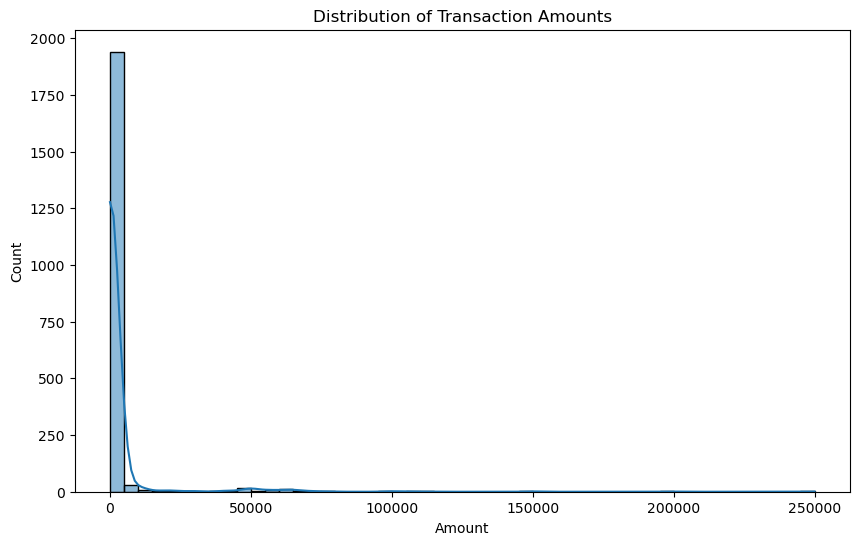

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.show()


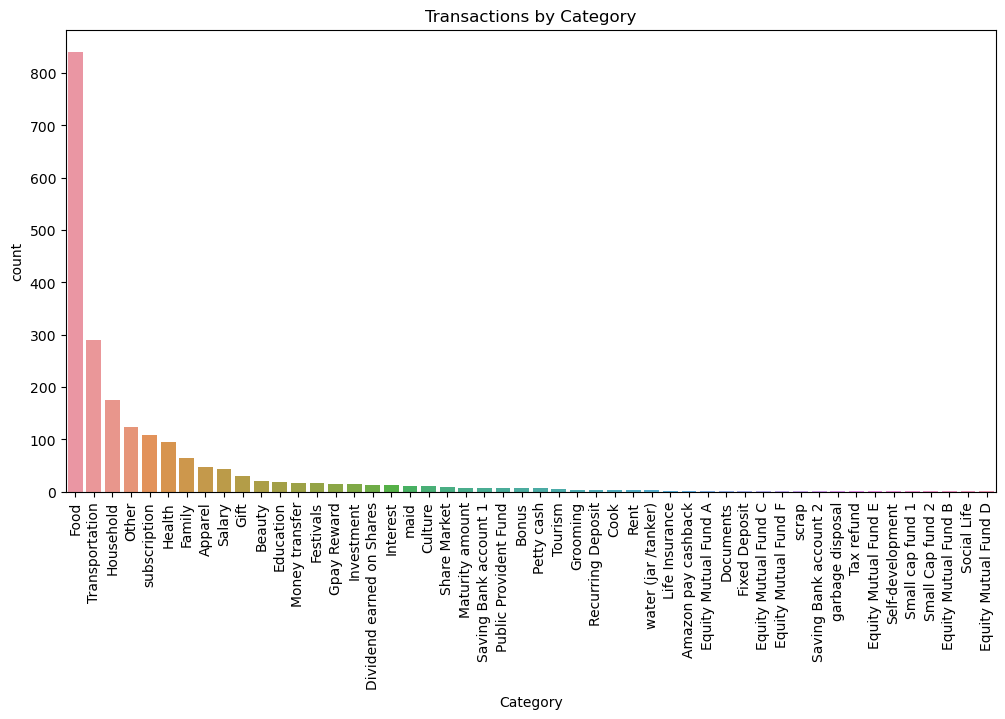

In [6]:
plt.figure(figsize=(12,6))
sns.countplot(x='Category', data=df, order=df['Category'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Transactions by Category')
plt.show()


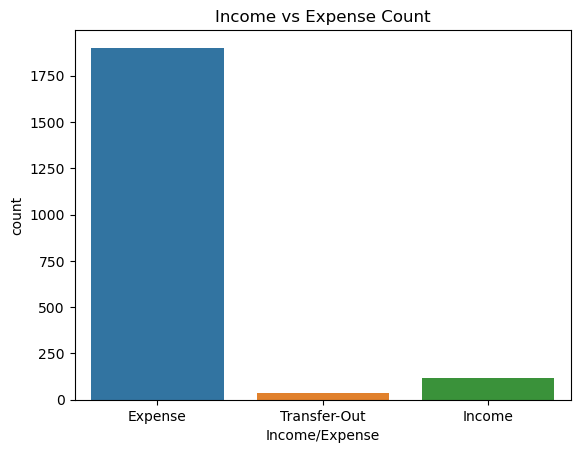

In [7]:
sns.countplot(x='Income/Expense', data=df)
plt.title('Income vs Expense Count')
plt.show()


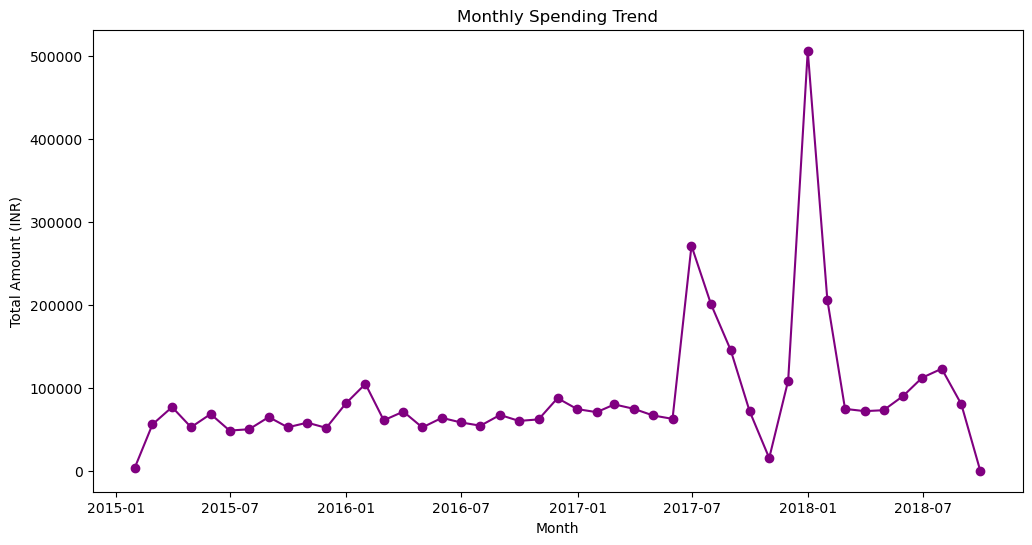

In [8]:
monthly_data = df.resample('M', on='Date').sum(numeric_only=True)
plt.figure(figsize=(12,6))
plt.plot(monthly_data.index, monthly_data['Amount'], marker='o', color='purple')
plt.title('Monthly Spending Trend')
plt.xlabel('Month')
plt.ylabel('Total Amount (INR)')
plt.show()


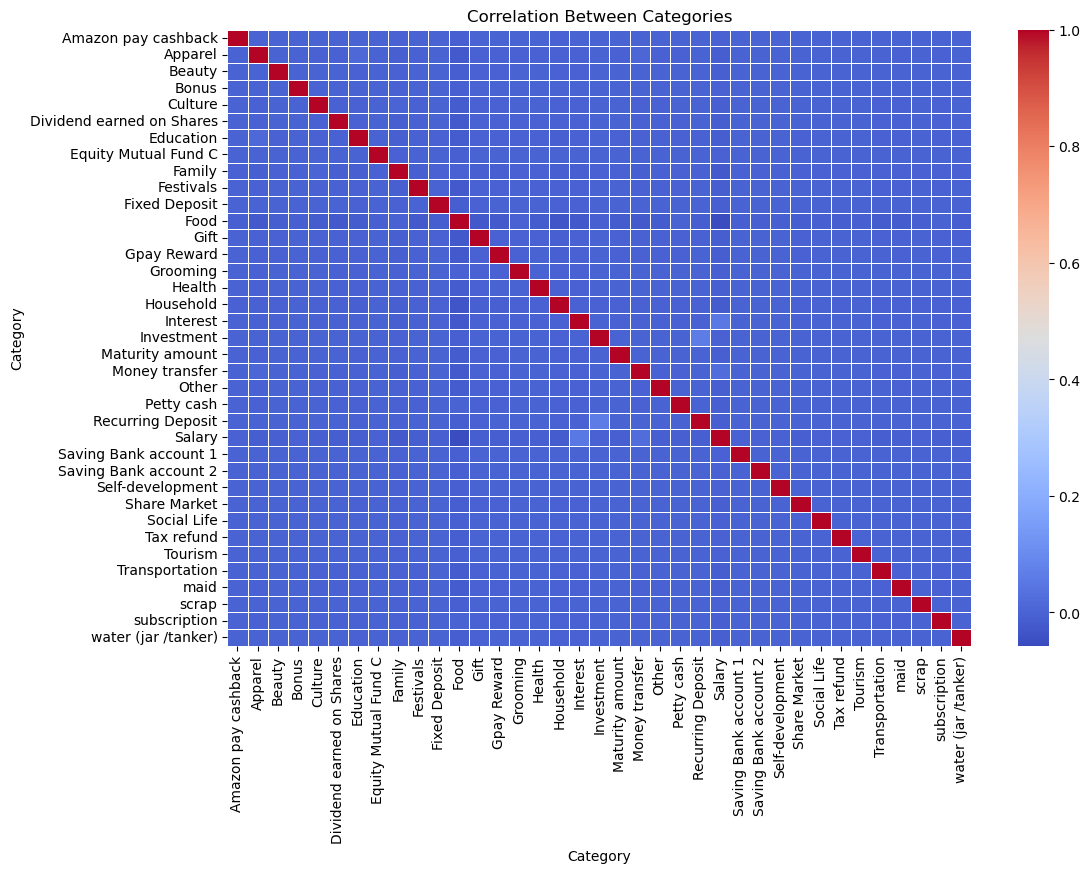

In [9]:
pivot = df.pivot_table(index='Date', columns='Category', values='Amount', aggfunc='sum', fill_value=0)
corr = pivot.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Categories')
plt.show()


In [10]:
df.head()


,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,2018-09-20 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,2018-09-20 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,NaT,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,2018-09-17 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,2018-09-16 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR
